
  <hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Script 1 | Case Challenge (Part 1)
<h3>DAT-5303 | Machine Learning</h3>
<br>Maria Andrea V. Oña - MSBA Cohort 1<br>
Hult International Business School - Boston Campus<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Introduction</h2><br>
pprentice Chef, Inc. is an innovative company with a unique spin on cooking at home.
Developed for the busy professional that has little to no skills in the kitchen, they offer a wide
selection of daily-prepared gourmet meals delivered directly to your door. After three years serving customers across the San Francisco Bay Area, the executives at Apprentice Chef have decided to take on an analytics project to better understand how much revenue to expect from each customer within their first year of using their services. Given that the company has instructed to “keep things simple” with a dataset of aggregated customer information, this script will essentially model an approach to base modeling and will be further developed as we see fit.
<br><br>
<h2>Challenge Objectives</h2><br>
a) Build a machine learning model to predict revenue over the first year of each customer’s life cycle.<br>
b) Identify key features that signficantly impact the Revenue.
<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Exploratory Dataset Analysis
 
 <h2>Initial Exploration of the Dataset</h2></br>

Import the following packages:
* pandas (as pd)
* seaborn (as sns)
* matplotlib.pyplot (as plt)
* statsmodel.formula.api (as smf)
* sklearn-model_selection (as train_test_split)
* sklearn.linear_model (as LinearRegression)
* scipy (as stats)

Then, load the dataset Apprentice_Chef_Datast.xlsx named as 'apchef'.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
import numpy as np #mathematical functions 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression 

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file_chef = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apchef = pd.read_excel(file_chef)


In [2]:
# viewing the entire column names / summary statistics of the dataset

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apchef.shape[0]}
Features:     {apchef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
# displaying the first 10 rows of the DataFrame
apchef.head(n = 10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


In [4]:
# information about each variable
apchef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

 <h4>Based on the outputs above, these variables are segmented into three groupings to determine which data type of each thee original variable falls under in the dataset.</h4>

    * CONTINUOUS
    * INTERVAL/COUNT
    * CATEGORICAL

In [5]:
# printing a table of the results
print(f"""

\tCONTINUOUS(3)\t\t\tNUMERICAL(21)\t\t\tCATEGORICAL(6)
---------------------------------------------------------------------------------------------
\t'REVENUE'\t\t\t'UNIQUE_MEALS_PURCH'\t\t'NAME'
\t'AVG_PREP_VID_TIME'\t\t'CONTACTS_W_CUSTOMER_SERVICE'\t'EMAIL'
\t'AVG_TIME_PER_SITE_VISIT'\t'TASTES_AND_PREFERENCES'\t'FIRST_NAME'
\t\t\t\t\t'PC_LOGINS'\t\t\t'FAMILY_NAME'
\t\t\t\t\t'MOBILE_LOGINS'\t\t\t'CROSS_SELL_SUCCESS'
\t\t\t\t\t'EARLY_DELIVERIES'\t\t'MOBILE_NUMBER'
\t\t\t\t\t'PACKAGE_LOCKER'
\t\t\t\t\t'LATE_DELIVERIES'
\t\t\t\t\t'TOTAL_PHOTOS_VIEWED'
\t\t\t\t\t'TOTAL_MEALS_ORDERED'
\t\t\t\t\t'WEEKLY_PLAN'
\t\t\t\t\t'CANCELLATIONS_BEFORE_NOON'
\t\t\t\t\t'CANCELLATIONS_AFTER_NOON'
\t\t\t\t\t'PRODUCT_CATEGORIES_VIEWED'
\t\t\t\t\t'LARGEST_ORDER_SIZE'
\t\t\t\t\t'MASTER_CLASSES_ATTENDED'
\t\t\t\t\t'AVG_CLICKS_PER_VISIT'
\t\t\t\t\t'REFRIGERATED_LOCKER'
\t\t\t\t\t'MASTER_CLASSES_ATTENDED'
\t\t\t\t\t'MEDIAN_MEAL_RATING'

""")



	CONTINUOUS(3)			NUMERICAL(21)			CATEGORICAL(6)
---------------------------------------------------------------------------------------------
	'REVENUE'			'UNIQUE_MEALS_PURCH'		'NAME'
	'AVG_PREP_VID_TIME'		'CONTACTS_W_CUSTOMER_SERVICE'	'EMAIL'
	'AVG_TIME_PER_SITE_VISIT'	'TASTES_AND_PREFERENCES'	'FIRST_NAME'
					'PC_LOGINS'			'FAMILY_NAME'
					'MOBILE_LOGINS'			'CROSS_SELL_SUCCESS'
					'EARLY_DELIVERIES'		'MOBILE_NUMBER'
					'PACKAGE_LOCKER'
					'LATE_DELIVERIES'
					'TOTAL_PHOTOS_VIEWED'
					'TOTAL_MEALS_ORDERED'
					'WEEKLY_PLAN'
					'CANCELLATIONS_BEFORE_NOON'
					'CANCELLATIONS_AFTER_NOON'
					'PRODUCT_CATEGORIES_VIEWED'
					'LARGEST_ORDER_SIZE'
					'MASTER_CLASSES_ATTENDED'
					'AVG_CLICKS_PER_VISIT'
					'REFRIGERATED_LOCKER'
					'MASTER_CLASSES_ATTENDED'
					'MEDIAN_MEAL_RATING'




 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

 
# Plotting Distribution

<h2>Analyzing the Distribution of Revenue</h2><br>
Notice how the Y-variable ( <em>Revenue</em> ) is encoded as an integer as it does not contain decimal places. This is very common in real estate pricing, but it is a slight violation of continuity. Although this informs us that our modeling results will be flawed, we must keep in mind that statistics and real-world applications are expected to have such misalignment. As a result, <strong>we do not expect our predictions to be perfect, but we do expect to develop a general understanding as to what features affect the sale price of a house in Ames, Iowa</strong>.<br><br>

<h4> A. Develop a histogram to analyze the distribution of the Y-variable.</h4><br>
Does it look as if this variable is normally distributed? Does it appear to be skewed positive or negative?

In [6]:
# descriptive statistics for numeric data
apchef.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


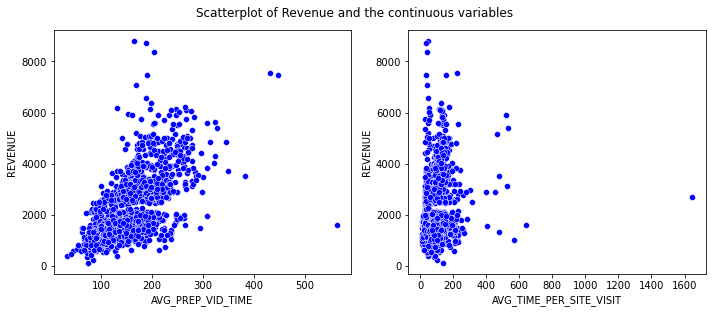

In [7]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x    = 'AVG_PREP_VID_TIME',
                y    = 'REVENUE',
                data = apchef,
                color = 'blue')

plt.subplot(2, 2, 2)
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = apchef,
                color = 'blue')

fig.suptitle('Scatterplot of Revenue and the continuous variables ')

plt.tight_layout()

 <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Working with with Interval and Count Data</h2><br>
Scatter plots can be very confusing when working with interval and count data. Therefore, it is a better practice is to use boxplots when visualizing relationships with such data. Run the code below for an example.

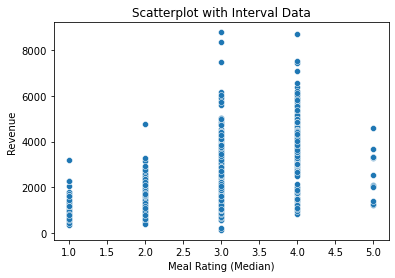

In [8]:
# developing a scatterplot
sns.scatterplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'REVENUE',
                data = apchef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Meal Rating (Median)')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

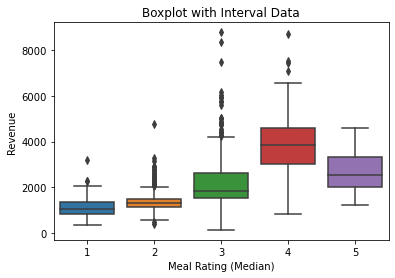

In [9]:
# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = apchef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Meal Rating (Median)')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

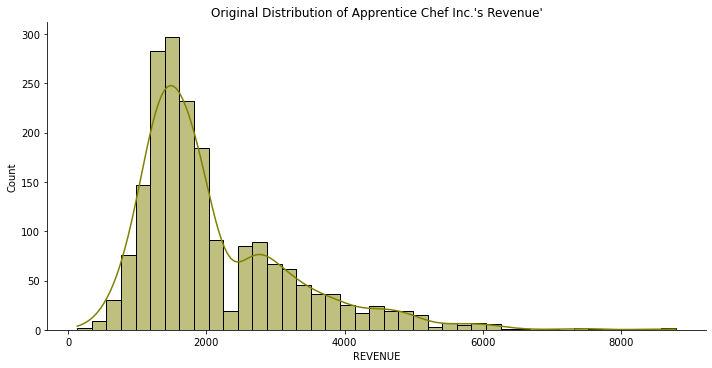

In [10]:
# developing a transformed histogram using DISPLOT
sns.displot(data   = apchef,
             kde = True,
             x      = 'REVENUE',
             height = 5,
             aspect = 2,
             color ='olive')


plt.title(label   = "Original Distribution of Apprentice Chef Inc.'s Revenue'")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


### Insights about the Distribution plot of the Revenue

Since the distribution for the Revenue alone is positively skewed (or skewed to the left), 
performing transformations is necessary and recommended. Common transformations for 
this kind of distribution is the logarithimic transformations and/or square root
transformation. In this case, x to log base of 10 will be the most ideal transformation
to make since it reduces the skewness to the right. 

Refer to the plot below for the log and sqrt transformation of the 'REVENUE'</br>

In [11]:
#logarithmic transformation 

apchef['LOG_REVENUE'] = np.log10(apchef['REVENUE'])

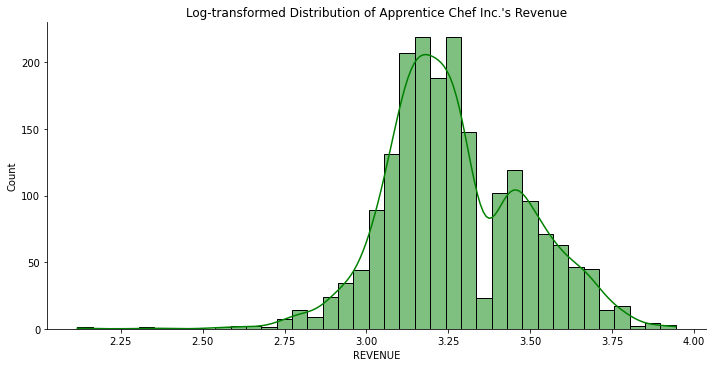

In [12]:
# developing a histogram using DISPLOT
sns.displot(data   = apchef,
            x      = 'LOG_REVENUE',
            kde    = True,
            height = 5,
            aspect = 2,
            color  ='green')


plt.title(label   = "Log-transformed Distribution of Apprentice Chef Inc.'s Revenue")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

## Insights: Two modes, non-symmetric

In [13]:
#square root transformation 

apchef['SQRT_REVENUE'] = (apchef['REVENUE'])**(0.5)

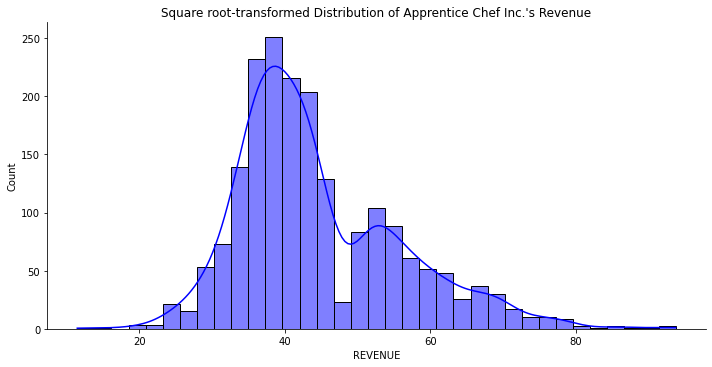

In [14]:
# developing a histogram using DISPLOT
sns.displot(data   = apchef,
            x      = 'SQRT_REVENUE',
            kde    = True,
            height = 5,
            aspect = 2,
            color  ='blue')


plt.title(label   = "Square root-transformed Distribution of Apprentice Chef Inc.'s Revenue")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

## Insights: Two modes, non-symmetric

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>TEST OF NORMALITY</h2><br>
Notice that the 'REVENUE' follows a bimodal distribution and is asymmetric, showing two distinct peaks 
that represent two modes.


Using a Q-Q plot, or a scatterplot created by plotting two sets of quantiles against one another to test the normality of these distribution despite being bimodal and asymmetric. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

In [15]:
import pylab #visualization of q-q plots
import scipy.stats as stats #prbability plots

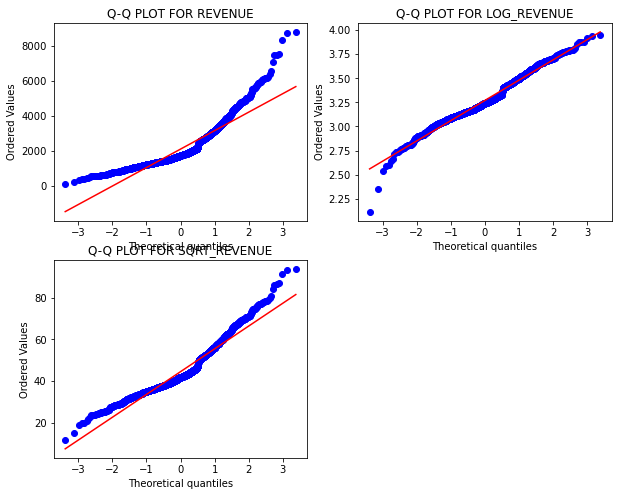

In [16]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
stats.probplot(apchef['REVENUE'], dist = "norm", plot= pylab)

plt.title("Q-Q PLOT FOR REVENUE")


# developing a scatterplot
plt.subplot(2, 2, 2)
stats.probplot(apchef['LOG_REVENUE'], dist = "norm", plot= pylab)

plt.title("Q-Q PLOT FOR LOG_REVENUE")


# developing a scatterplot
plt.subplot(2, 2, 3)
stats.probplot(apchef['SQRT_REVENUE'], dist = "norm", plot= pylab)

plt.title("Q-Q PLOT FOR SQRT_REVENUE")

#displaying the results
pylab.show()

### Insights about the normality of the distribution plots

Overall appearance of these normal probability plots, LOG_REVENUE showed normal distribution 
following a straight line and almost matched with it perfectly as compared to the other transformations. 
This just imply that it is statistically evident that LOG_REVENUE relatively the data points 
is normally distributed data fall in the few highest and lowest quantiles. 


# Feature Engineering

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Handling Interval and Count Data</h3><br>
Let's take a look at the relationship between the Cancellations and Weekly subscription to discount promotion 
of the customers.

In [17]:
# flagging of dummy variables
apchef['has_Cancellations_BefNoon']   = 0
apchef['has_Cancellations_AftNoon']   = 0
apchef['has_bought']                  = 0
apchef['has_Avg_Order_Size']          = 0
apchef['has_Weekly_Plan']             = 0
apchef['has_Masterclass']             = 0



# iterating over each original column to
# change values in the new feature columns
for index, value in apchef.iterrows():
    
    # CANCELLATIONS_BEFORE_NOON
    if apchef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 1:
        apchef.loc[index, 'has_Cancellations_BefNoon'] = 1
        
    # MASTERCLASS
    # Setting all customers with at least 1 masterclass attended
    if apchef.loc[index, 'UNIQUE_MEALS_PURCH'] > 1:
        apchef.loc[index, 'has_bought'] = 1


    # CANCELLATIONS_AFTER_NOON
    if apchef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 1:
        apchef.loc[index, 'has_Cancellations_AftNoon'] = 1
        
        
    # LARGEST_ORDER_SIZE
    # Flagging all customers with average of 4 orders per week
    if apchef.loc[index, 'LARGEST_ORDER_SIZE'] > 4:
        apchef.loc[index, 'has_Avg_Order_Size'] = 1
        
    # WEEKLY PLAN
    # Setting all customers with at least 11 weeks of subscription
    if apchef.loc[index, 'WEEKLY_PLAN'] > 10:
        apchef.loc[index, 'has_Weekly_Plan'] = 1
        
    # MASTERCLASS
    # Setting all customers with at least 1 masterclass attended
    if apchef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 1:
        apchef.loc[index, 'has_Masterclass'] = 1

In [18]:
# total meals purchased
apchef['TOTAL_MEALS_PURCHASED'] = apchef['TOTAL_MEALS_ORDERED'] * (apchef['LARGEST_ORDER_SIZE'])

#weekly plan and meals purchased
apchef['WEEKLY_ORDER'] = apchef['WEEKLY_PLAN'] * apchef['LARGEST_ORDER_SIZE']

# total marketing effectivity 
apchef['MARKETING_CLICKS'] = (apchef['AVG_CLICKS_PER_VISIT'] * apchef['PRODUCT_CATEGORIES_VIEWED'])

#total online clicks
apchef['ONLINE_CLICKS'] = (apchef['AVG_CLICKS_PER_VISIT'] * (apchef['PC_LOGINS'] * apchef['MOBILE_LOGINS']))

# total cancellations after
apchef['UNIQUE_AFTCANCELLATIONS'] = apchef['CANCELLATIONS_AFTER_NOON'] / apchef['UNIQUE_MEALS_PURCH']

# total cancellations before
apchef['UNIQUE_BEFCANCELLATIONS'] = apchef['CANCELLATIONS_BEFORE_NOON'] / apchef['UNIQUE_MEALS_PURCH']

#Contacts/median rating
apchef['CONTACT_CUSTOMER_MEDIAN'] = apchef['CONTACTS_W_CUSTOMER_SERVICE'] * apchef['MEDIAN_MEAL_RATING']

#averagetime and meals ordered
apchef['TIME_VISIT_ORDERED'] =apchef['AVG_TIME_PER_SITE_VISIT']*apchef['TOTAL_MEALS_ORDERED']

#marketing effectivity
apchef['CLICKS_MEDIAN_RATING'] = apchef['AVG_CLICKS_PER_VISIT']**apchef['MEDIAN_MEAL_RATING']

#visit per login
apchef["VISIT_PER_LOGIN"] = apchef["AVG_TIME_PER_SITE_VISIT"] / apchef["PC_LOGINS"]

#customer inquiries and purchase
apchef["CONTACT_CUSTOMER_PURCHASE"] = apchef["CONTACTS_W_CUSTOMER_SERVICE"] / apchef["UNIQUE_MEALS_PURCH"]

#unique meals per order
apchef["UNIQUE_PER_ORDER"] = apchef["has_bought"] / apchef["UNIQUE_MEALS_PURCH"]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Model Development
In order to work with statsmodels, we need to concatenate our training data on the 'x' side (X_train) and our training data on the 'y' side (y_train). Then, we can begin building models and analyze their results. Let's test our best model from our previous session to see how it performs. In the interest of time, this has already been prepared. Our goal is to ensure that the p-values are still significant after splitting the feature-engineered dataset.<br>
<br>
<div align="center">The models were trained using all of the data.</div><br>
The primary goal of building machine learning models is to predict well on observations where the end result is unknown (i.e. new cases). Therefore, we need to set aside a portion of our data before training our model (known as a <strong>testing</strong> or <strong>validation set</strong>). After training, we can use this set to see how our algorithm performs on new data.<br><br>


In [19]:

# preparing explanatory variable data
apchef_data = apchef.drop(['NAME',
                           'EMAIL',
                           'FIRST_NAME',
                           'FAMILY_NAME',
                           'REVENUE', 
                           'LOG_REVENUE',
                           'SQRT_REVENUE'],
                           axis = 1)

# preparing response variable data
log_apchef_target = apchef.loc[ : , 'LOG_REVENUE'] 


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            apchef_data,
            log_apchef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 41)
y-side: (1459,)


Testing Data
------------
X-side: (487, 41)
y-side: (487,)



In [20]:
#determine index for continuous variables 
features = apchef_data.dtypes[apchef_data.dtypes != 'object'].index

print(features)

Index(['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'has_Cancellations_BefNoon', 'has_Cancellations_AftNoon', 'has_bought', 'has_Avg_Order_Size', 'has_Weekly_Plan', 'has_Masterclass', 'TOTAL_MEALS_PURCHASED', 'WEEKLY_ORDER', 'MARKETING_CLICKS', 'ONLINE_CLICKS', 'UNIQUE_AFTCANCELLATIONS', 'UNIQUE_BEFCANCELLATIONS', 'CONTACT_CUSTOMER_MEDIAN', 'TIME_VISIT_ORDERED', 'CLICKS_MEDIAN_RATING', 'VISIT_PER_LOGIN', 'CONTACT_CUSTOMER_PURCHASE', 'UNIQUE_PER_ORDER'], dtype='object')


In [21]:
x_vars = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
          'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
          'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
          'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 
          'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
          'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
          'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
          'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
          'has_Cancellations_BefNoon', 'has_Cancellations_AftNoon', 'has_Avg_Order_Size',
          'has_Weekly_Plan', 'TOTAL_MEALS_PURCHASED', 'WEEKLY_ORDER', 
          'MARKETING_CLICKS', 'ONLINE_CLICKS', 'UNIQUE_AFTCANCELLATIONS', 'UNIQUE_BEFCANCELLATIONS']


# looping to make x-variables suitable for statsmodels
for val in x_vars:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
has_Cancellations_BefNoon +
has_Cancellations_AftNoon +
has_Avg_Order_Size +
has_Weekly_Plan +
TOTAL_MEALS_PURCHASED +
WEEKLY_ORDER +
MARKETING_CLICKS +
ONLINE_CLICKS +
UNIQUE_AFTCANCELLATIONS +
UNIQUE_BEFCANCELLATIONS +


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2> Ordinary Least Square Regression Model</h2><br>

In [22]:
# applying model in scikit-learn


# Preparing the target variable
apchef_target = apchef.loc[ : , 'REVENUE'] #use for later
log_apchef_target = apchef.loc[ : , 'LOG_REVENUE']
sqrt_apchef_target = apchef.loc[ : , 'SQRT_REVENUE'] #use for later

###############################################
## setting up more than one train-test split ##
###############################################

# FULL X-dataset (normal Y)
x_train, x_test, y_train, y_test = train_test_split(
            apchef_data,
            log_apchef_target,
            test_size = 0.25,
            random_state = 219)

In [23]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.764
OLS Testing Score  : 0.7469
OLS Train-Test Gap : 0.0171


In [24]:
# zipping each feature name to its coefficient
lr_model_values = zip(apchef_data[x_vars].columns,
                      lr_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3.5384)
('CROSS_SELL_SUCCESS', -0.0095)
('TOTAL_MEALS_ORDERED', 0.0018)
('UNIQUE_MEALS_PURCH', -0.0025)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0399)
('PRODUCT_CATEGORIES_VIEWED', -0.0086)
('AVG_TIME_PER_SITE_VISIT', 0.0014)
('MOBILE_NUMBER', 0.0099)
('CANCELLATIONS_BEFORE_NOON', 0.006)
('CANCELLATIONS_AFTER_NOON', 0.0064)
('TASTES_AND_PREFERENCES', 0.0048)
('PC_LOGINS', -0.0246)
('MOBILE_LOGINS', -0.0191)
('WEEKLY_PLAN', -0.0005)
('EARLY_DELIVERIES', -0.0022)
('LATE_DELIVERIES', 0.0001)
('PACKAGE_LOCKER', -0.0043)
('REFRIGERATED_LOCKER', -0.0163)
('AVG_PREP_VID_TIME', 0.0016)
('LARGEST_ORDER_SIZE', -0.0097)
('MASTER_CLASSES_ATTENDED', 0.0478)
('MEDIAN_MEAL_RATING', -0.0353)
('AVG_CLICKS_PER_VISIT', -0.0092)
('TOTAL_PHOTOS_VIEWED', 0.0001)
('has_Cancellations_BefNoon', -0.008)
('has_Cancellations_AftNoon', 0.0265)
('has_Avg_Order_Size', -0.2623)
('has_Weekly_Plan', 0.0099)
('TOTAL_MEALS_PURCHASED', 0.0034)
('WEEKLY_ORDER', -0.045)
('MARKETING_CLICKS', -0.0001)
('ONLINE_CLICKS'

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Lasso Regression Model</h2><br>
Instantiate, fit, predict, and score a lasso regression model ( <strong>sklearn.linear_model.Lasso( ) </strong>) 

In [25]:
import sklearn.linear_model # linear models

In [26]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.005,  # default shrinkage
                                        normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7348
Lasso Testing Score  : 0.7214
Lasso Train-Test Gap : 0.0134


In [27]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apchef_data.columns, lasso_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.9318)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.002)
('UNIQUE_MEALS_PURCH', 0.0029)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0388)
('PRODUCT_CATEGORIES_VIEWED', -0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0001)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', -0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', -0.0)
('EARLY_DELIVERIES', -0.0011)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0016)
('LARGEST_ORDER_SIZE', -0.0)
('MASTER_CLASSES_ATTENDED', 0.0206)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0001)
('TOTAL_PHOTOS_VIEWED', 0.0001)
('has_Cancellations_BefNoon', -0.0)
('has_Cancellations_AftNoon', 0.0)
('has_bought', -0.0405)
('has_Avg_Order_Size', 0.0)
('has_Weekly_Plan', -0.0)
('has_Masterclass', 0.0)
('TOTAL_MEALS_PURCHASED', -0.0002)
('WEEKLY_ORDER', 0.0)
('MARKETING_CLICKS', 0.0001)
('ONLINE_CLICKS', -0.000

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Bayesian ARD Model</h2><br>
Instantiate, fit, predict, and score a ARD model ( <strong>sklearn.linear_model.ARDRegression( ) </strong>) 

In [28]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = True)


# FITTING the training data
ard_fit = ard_model.fit(x_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7597
Testing Score : 0.7505
ARD Train-Test Gap : 0.0092


In [29]:
# zipping each feature name to its coefficient
ard_model_values = zip(apchef_data.columns, ard_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.2193)
('CROSS_SELL_SUCCESS', -0.0051)
('TOTAL_MEALS_ORDERED', 0.0017)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0373)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0015)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0001)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0001)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0015)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0001)
('REFRIGERATED_LOCKER', -0.0176)
('AVG_PREP_VID_TIME', 0.0015)
('LARGEST_ORDER_SIZE', -0.002)
('MASTER_CLASSES_ATTENDED', 0.049)
('MEDIAN_MEAL_RATING', -0.0159)
('AVG_CLICKS_PER_VISIT', -0.0012)
('TOTAL_PHOTOS_VIEWED', 0.0001)
('has_Cancellations_BefNoon', -0.0)
('has_Cancellations_AftNoon', 0.0005)
('has_bought', -0.2465)
('has_Avg_Order_Size', 0.0)
('has_Weekly_Plan', 0.0001)
('has_Masterclass', -0.0423)
('TOTAL_MEALS_PURCHASED', -0.0001)
('WEEKLY_ORDER', 0.0)
('MARKETING_CLICKS', 0.0001)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Summary of Results

In [30]:
# comparing results

print(f"""
Model        Train Score      Test Score      Test Gap      Model Size      
-----        -----------      ----------      ----------    ----------     
OLS           {lr_train_score}            {lr_test_score}            {lr_test_gap}         {len(lr_model_lst)}              
Lasso         {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}         {len(lasso_model_lst)}   
ARD (final)   {ard_train_score}           {ard_test_score}            {ard_test_gap}         {len(ard_model_lst)}              
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD (final)'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


Model        Train Score      Test Score      Test Gap      Model Size      
-----        -----------      ----------      ----------    ----------     
OLS           0.764            0.7469            0.0171         34              
Lasso         0.7348           0.7214            0.0134         42   
ARD (final)   0.7597           0.7505            0.0092         42              



 <h2>Model Selection</h2><br> 

Among all the candidates of machine learning models for a training dataset, we can safely conclude that 
<strong> Bayesian ARD Model </strong> is the better model (safe to say the good enough one) provided that it has the highest test score of <strong> 0.7505 </strong> and lowest test gap at <strong> 0.0092 </strong>.  

In [31]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

print(model_performance)

    Model Type  Training  Testing  Train-Test Gap  Model Size                                              Model
0          OLS    0.7640   0.7469          0.0171          34  [(intercept, 3.5384), (CROSS_SELL_SUCCESS, -0....
1        Lasso    0.7348   0.7214          0.0134          42  [(intercept, 2.9318), (CROSS_SELL_SUCCESS, -0....
2  ARD (final)    0.7597   0.7505          0.0092          42  [(intercept, 3.2193), (CROSS_SELL_SUCCESS, -0....
